In [1]:
# Original coding process

import sqlite3
import pandas as pd

# Connecting to the database
conn = sqlite3.connect('/Users/diboshbaruah/Desktop/Database.db')
data = pd.read_sql_query('SELECT * FROM Insurance_Prediction', conn)

print("Dataset successfully loaded...\n")

# Displaying the first few rows to inspect the data
print("Displaying first few rows of the dataset:\n")
print(data.head())

# Checking data types before conversion
print("\nData types before conversion:")
print(data.dtypes)

# Closing the connection
conn.close()


Dataset successfully loaded...

Displaying first few rows of the dataset:

    age  gender    bmi children smoker     region medical_history  \
0  46.0    male  21.45      5.0    yes  southeast        Diabetes   
1  25.0  female  25.38      2.0    yes  northwest        Diabetes   
2  38.0    male  44.88      2.0    yes  southwest                   
3  25.0    male  19.89      0.0     no  northwest                   
4  49.0    male  38.21      3.0    yes  northwest        Diabetes   

  family_medical_history exercise_frequency    occupation coverage_level  \
0                                     Never   Blue collar        Premium   
1    High blood pressure       Occasionally  White collar        Premium   
2    High blood pressure       Occasionally   Blue collar        Premium   
3               Diabetes             Rarely  White collar       Standard   
4    High blood pressure             Rarely  White collar       Standard   

              charges  
0  20460.307668871566  
1    

In [2]:
# Converting columns to numeric where applicable
numeric_cols = ['age', 'bmi', 'children', 'charges']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [3]:
# Calculating Q1, Q3, and IQR for each numerical column
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying  outliers by applying the boundaries to the data
outliers = ((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).any(axis=1)

# Counting the number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

# Displaying the rows containing outliers
outlier_rows = data[outliers]
print("\nRows containing outliers:")
print(outlier_rows)


Number of outliers: 2217

Rows containing outliers:
         age  gender    bmi  children smoker     region medical_history  \
59      49.0  female  44.67       5.0    yes  northwest   Heart disease   
117     46.0    male  42.33       2.0    yes  southwest   Heart disease   
704     53.0  female  48.23       3.0    yes  southeast   Heart disease   
804     53.0  female  35.30       0.0    yes  southwest   Heart disease   
1451    63.0    male  41.76       2.0    yes  northwest   Heart disease   
...      ...     ...    ...       ...    ...        ...             ...   
998316   NaN    male  39.52       3.0    yes  northeast   Heart disease   
998667  65.0    male  49.77       4.0    yes  southeast   Heart disease   
999077  37.0  female  22.70       0.0    yes  northeast   Heart disease   
999319  25.0  female  42.41       4.0    yes  northeast   Heart disease   
999790  64.0    male  44.41       3.0    yes  southeast   Heart disease   

       family_medical_history exercise_frequenc

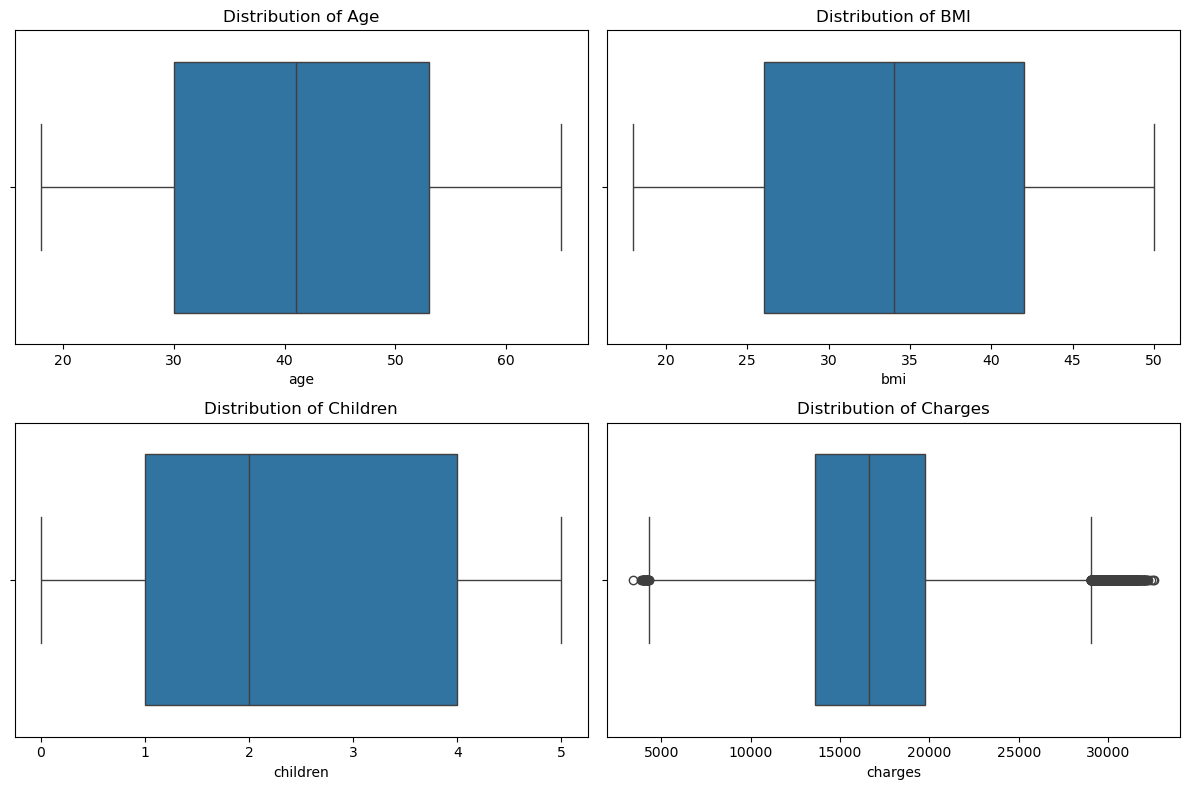

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for outliers
plt.figure(figsize=(12, 8))

# Box plot for age
plt.subplot(2, 2, 1)
sns.boxplot(x=data['age'])
plt.title('Distribution of Age')

# Box plot for BMI
plt.subplot(2, 2, 2)
sns.boxplot(x=data['bmi'])
plt.title('Distribution of BMI')

# Box plot for children
plt.subplot(2, 2, 3)
sns.boxplot(x=data['children'])
plt.title('Distribution of Children')

# Box plot for charges
plt.subplot(2, 2, 4)
sns.boxplot(x=data['charges'])
plt.title('Distribution of Charges')

# Adjust layout
plt.tight_layout()
plt.show()


In [5]:
# Data Pre-processing
print("Initiating data pre-processing..")

# Converting columns to appropriate data types (if not already done)
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')
data['children'] = pd.to_numeric(data['children'], errors='coerce')
data['charges'] = pd.to_numeric(data['charges'], errors='coerce')

# Converting categorical columns to 'category' dtype
data['gender'] = data['gender'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] = data['region'].astype('category')
data['medical_history'] = data['medical_history'].astype('category')
data['family_medical_history'] = data['family_medical_history'].astype('category')
data['exercise_frequency'] = data['exercise_frequency'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['coverage_level'] = data['coverage_level'].astype('category')

# Performing one-hot encoding on the categorical columns
data_encoded = pd.get_dummies(data, columns=[
    'gender', 'smoker', 'region', 'medical_history', 
    'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level'], drop_first=True)

# Filling NaN values with 0
data_encoded = data_encoded.fillna(0)

# Converting boolean columns (True/False) to integer (1/0)
data_encoded = data_encoded.astype(int)


Initiating data pre-processing..


In [6]:
# Checking data types after conversion

print(data_encoded.head())


   age  bmi  children  charges  gender_female  gender_male  smoker_yes  \
0   46   21         5    20460              0            1           1   
1   25   25         2    20390              1            0           1   
2   38   44         2    20204              0            1           1   
3   25   19         0    11789              0            1           0   
4   49   38         3    19268              0            1           1   

   region_northwest  region_southeast  region_southwest  ...  \
0                 0                 1                 0  ...   
1                 1                 0                 0  ...   
2                 0                 0                 1  ...   
3                 1                 0                 0  ...   
4                 1                 0                 0  ...   

   family_medical_history_High blood pressure  exercise_frequency_Never  \
0                                           0                         1   
1                   

In [7]:
# Checking for missing values in the dataset after conversion

missing_values = data_encoded.isnull().sum()
print("Missing values for each column:")
print(missing_values)


Missing values for each column:
age                                           0
bmi                                           0
children                                      0
charges                                       0
gender_female                                 0
gender_male                                   0
smoker_yes                                    0
region_northwest                              0
region_southeast                              0
region_southwest                              0
medical_history_Diabetes                      0
medical_history_Heart disease                 0
medical_history_High blood pressure           0
family_medical_history_Diabetes               0
family_medical_history_Heart disease          0
family_medical_history_High blood pressure    0
exercise_frequency_Never                      0
exercise_frequency_Occasionally               0
exercise_frequency_Rarely                     0
occupation_Blue collar                        0
occupati

In [8]:
# Feature Engineering
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
data_encoded['bmi_category'] = pd.cut(data_encoded['bmi'], bins=bins, labels=labels)

# One-hot encoding bmi_category 
data_encoded = pd.get_dummies(data_encoded, columns=['bmi_category'], drop_first=True)


In [9]:
# Splitting  the dataset into training, evaluation, and live data 

# Splitting  first 700k records for training (train size = 700,000)
train_data = data_encoded.iloc[:700000]
X_train = train_data.drop(columns=['charges'])  # Features
y_train = train_data['charges']  # Target variable

# Splitting  next 200k records for evaluation (eval size = 200,000)
eval_data = data_encoded.iloc[700000:900000]
X_eval = eval_data.drop(columns=['charges'])  # Features
y_eval = eval_data['charges']  # Target variable

# Will use remaining 100k records as live data (live size = 100,000)
live_data = data_encoded.iloc[900000:]
X_live = live_data.drop(columns=['charges'])  # Features
y_live = live_data['charges']  # Target variable


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=42)

# Training  the model on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Model Prediction and Evaluation on evaluation dataset
print("\nModel Evaluation on the evaluation dataset...\n")

# Predictions on evaluation set
y_eval_pred = rf_regressor.predict(X_eval)

# Evaluating the model on evaluation dataset
mse = mean_squared_error(y_eval, y_eval_pred)
r2 = r2_score(y_eval, y_eval_pred)
mae = mean_absolute_error(y_eval, y_eval_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (Evaluation Set): {mse}")
print(f"R^2 (Evaluation Set): {r2}")
print(f"Mean Absolute Error (Evaluation Set): {mae}")
print(f"Root Mean Squared Error (Evaluation Set): {rmse}")

# Model Evaluation on live dataset
print("\nModel Evaluation on live dataset...\n")

# Predictions on live data
y_live_pred = rf_regressor.predict(X_live)

# Evaluating the model on live dataset
mse_live = mean_squared_error(y_live, y_live_pred)
r2_live = r2_score(y_live, y_live_pred)
mae_live = mean_absolute_error(y_live, y_live_pred)
rmse_live = np.sqrt(mse_live)

print(f"Mean Squared Error (Live Set): {mse_live}")
print(f"R^2 (Live Set): {r2_live}")
print(f"Mean Absolute Error (Live Set): {mae_live}")
print(f"Root Mean Squared Error (Live Set): {rmse_live}")



Model Evaluation on the evaluation dataset...

Mean Squared Error (Evaluation Set): 222379.48812875623
R^2 (Evaluation Set): 0.9886071477464806
Mean Absolute Error (Evaluation Set): 370.4485876982141
Root Mean Squared Error (Evaluation Set): 471.5712969729564

Model Evaluation on live dataset...

Mean Squared Error (Live Set): 221656.89872781327
R^2 (Live Set): 0.9885407292677871
Mean Absolute Error (Live Set): 370.87286679583343
Root Mean Squared Error (Live Set): 470.8045228412884


** Now running the saved scripts on jupyter notebook - train_model.py // predict_fraud.py // app.py ***

In [1]:
# Importing the training script
!python train_model.py


Model trained and saved successfully!


In [3]:
# Importing the Predict script
!python predict_model.py



Model Evaluation on the evaluation dataset...

Mean Squared Error (Evaluation Set): 222379.48812875623
R^2 (Evaluation Set): 0.9886071477464806
Mean Absolute Error (Evaluation Set): 370.4485876982141
Root Mean Squared Error (Evaluation Set): 471.5712969729564

Model Evaluation on live dataset...

Mean Squared Error (Live Set): 221656.89872781327
R^2 (Live Set): 0.9885407292677871
Mean Absolute Error (Live Set): 370.87286679583343
Root Mean Squared Error (Live Set): 470.8045228412884


In [3]:
import subprocess

# Now running the Flask app using subprocess
subprocess.Popen(["python", "app.py"])


<Popen: returncode: None args: ['python', 'app.py']>

In [4]:
# Sample input data

import requests

data = {
    'age': 60,
    'bmi': 28.5,
    'children': 1,
    'gender_male': 1,
    'smoker_yes': 0,
    'region_northwest': 0,
    'region_southeast': 1,
    'region_southwest': 0,
    'medical_history_yes': 1,
    'family_medical_history_yes': 0,
    'exercise_frequency_high': 0,
    'exercise_frequency_medium': 1,
    'exercise_frequency_low': 0,
    'occupation_occupation1': 0,
    'occupation_occupation2': 1,
    'coverage_level_high': 0,
    'coverage_level_low': 1,
    'bmi_category_Overweight': 1,
    'bmi_category_Obese': 0
}

# API endpoint
url = 'http://127.0.0.1:5000/predict' 

# Sending POST request
response = requests.post(url, json=data)

# Printing the result 
try:
    print(response.json())
except Exception as e:
    print(f"Error in response: {e}")
    print(f"Response content: {response.text}")


{'prediction': 9437.538769246914}
